In [8]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations

In [9]:
env = gym.make("CartPole-v1")
print(env.action_space.n)

2


/mnt/store/xxy/anaconda3_new/envs/rl/lib/python3.10/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [10]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

In [11]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [12]:
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [13]:
mean_reward_list = []
for episode in range(EPISODES ): #//go through the episodes
    t0 = time.time() #//set the initial time
    discrete_state = get_discrete_state(env.reset()) #//get the discrete start for the restarted environment 
    done = False
    episode_reward = 0 #//reward starts as 0 for each episode

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) #//take cordinated action
        else:

            action = np.random.randint(0, env.action_space.n) #//do a random ation

        new_state, reward, done, _ = env.step(action) #//step action to get new states, reward, and the "done" status.

        episode_reward += reward #//add the reward

        new_discrete_state = get_discrete_state(new_state)

        # if episode % 2000 == 0: 
        #     env.render()

        if not done: #//update q-table
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05:# //epsilon modification
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0:
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        mean_reward_list.append(mean_reward)
        total_reward = 0

env.close()

/tmp/ipykernel_1391958/2102410102.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Time Average: 3.35693359375e-06
Mean Reward: 0.029
Time Average: 0.0006117296218872071
Mean Reward: 22.414
Time Average: 0.0005394613742828369
Mean Reward: 22.244
Time Average: 0.0005554866790771485
Mean Reward: 22.385
Time Average: 0.0005378727912902832
Mean Reward: 22.259
Time Average: 0.0005409541130065918
Mean Reward: 21.831
Time Average: 0.0005592107772827148
Mean Reward: 22.551
Time Average: 0.0004725334644317627
Mean Reward: 22.052
Time Average: 0.0004679741859436035
Mean Reward: 22.414
Time Average: 0.0004646897315979004
Mean Reward: 22.489
Time Average: 0.00046669220924377443
Mean Reward: 22.388
Time Average: 0.00047245001792907713
Mean Reward: 23.071
Epsilon: 0.9277417467531685
Time Average: 0.0005119073390960693
Mean Reward: 24.41
Time Average: 0.0005304906368255616
Mean Reward: 25.59
Epsilon: 0.8394533480303666
Time Average: 0.0005682599544525146
Mean Reward: 26.883
Epsilon: 0.7985117269685725
Epsilon: 0.7787959154194878
Time Average: 0.0006128225326538086
Mean Reward: 28.8

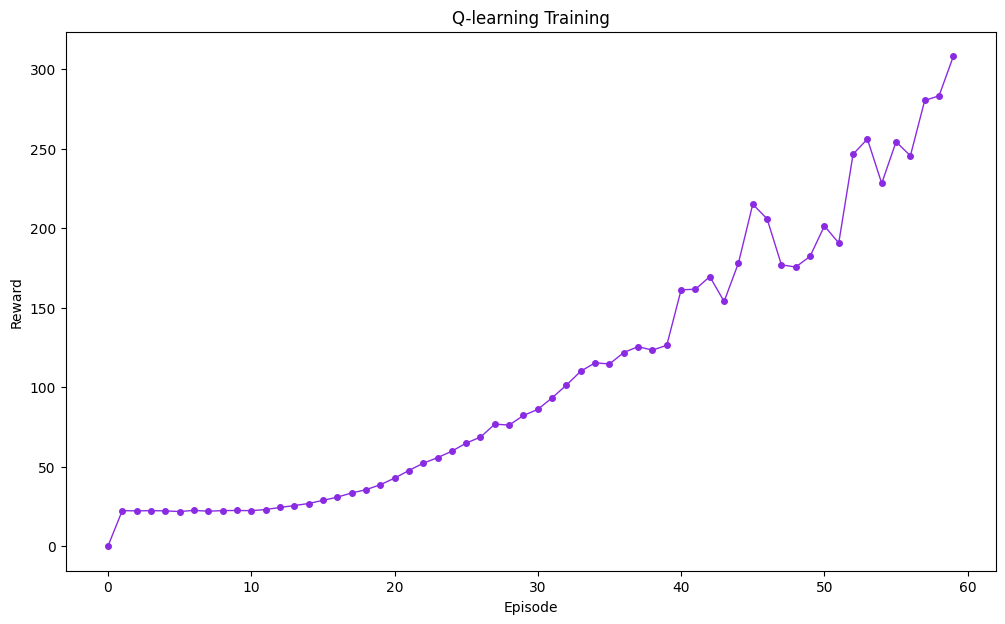

In [14]:
# Plot the rewards over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))  # 调整图片宽度，更宽一些
plt.plot(
    mean_reward_list,
    color='blueviolet', 
    marker='o',
    linewidth=1,  # 线条更细
    markersize=4   # 标记更小
)
plt.title(f"Q-learning Training")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.savefig(f"Q-learning Training.png")

In [ ]:
# !pip install gym==0.15.6

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.5 MB/s eta 0:00:00a 0:00:01
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c1/49/334e279caa3231255725c8e860fa93e72083567625573421db8875846c14/cloudpickle-1.2.2-py2.py3-none-any.whl (25 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl (491 kB)
  Created wheel for gym: filename=gym-0.15.6-py3-none-any.whl size=1648632 sha256=695aed69fcffbb84f3acfd01b5d32d8203eca252a09f248f6d4b0671f60bb4b3
  Stored in directory: /home/xxy-y24/.cache/pip/wheels/8b/23/eb/95cb9b34965955a9e1f9375b31468a53ee234f38369971ae53
Successfully built gym
  Attempting uninstal